In [21]:
import pandas as pd
url='https://raw.githubusercontent.com/Vincent-Toups/bios611-project1/master/source_data/datasets_38396_60978_charcters_stats.csv'
df=pd.read_csv(url,error_bad_lines=False)
df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [49]:
df_na=df[df.Power!=0]
df_no=df_na.drop(["Name","Alignment","Total"],axis=1)
df_no

,Intelligence,Strength,Speed,Durability,Power,Combat
0,50,31,43,32,25,52
1,38,100,17,80,17,64
2,88,14,35,42,35,85
3,50,90,53,64,84,65
4,63,80,53,90,55,95
...,...,...,...,...,...,...
606,88,10,12,28,12,14
607,50,10,35,28,31,28
608,50,100,27,100,83,28
609,75,10,23,28,100,56


In [54]:
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import numpy as np

mms = MinMaxScaler();

normed = mms.fit_transform(df_no)
distances = pairwise_distances(normed)
adj = distances < 0.5

sc = SpectralClustering(3,affinity="precomputed")
df_no['cluster'] = sc.fit_predict(adj);

tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df_no)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 432 samples in 0.001s...
[t-SNE] Computed neighbors for 432 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 12.799631
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.234245
[t-SNE] KL divergence after 1000 iterations: 0.753073


In [65]:
lowd=pd.DataFrame(tsne_em,columns=["X1","X2"])
lowd["cluster"]=df_no['cluster']

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/rstudio/q3.pdf


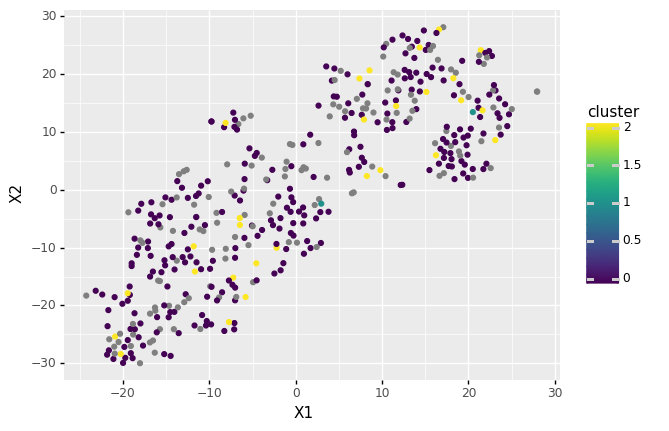

<ggplot: (8762147981547)>

In [66]:
from plotnine import *
q3=ggplot(lowd,aes("X1","X2"))+geom_point(aes(color="cluster"))
q3.save('/home/rstudio/q3.pdf')
q3

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/rstudio/q4.pdf


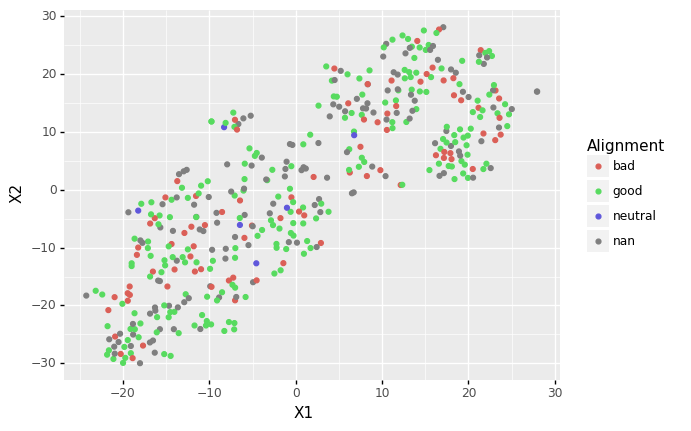

<ggplot: (8762147949141)>

In [67]:
q4=ggplot(lowd,aes("X1","X2"))+geom_point(aes(color=df_na['Alignment']))
q4.save('/home/rstudio/q4.pdf')
q4

In [72]:
lowd.to_csv(r'/home/rstudio/lowd.csv' ,index=False)

In [71]:
df_na.to_csv(r'/home/rstudio/df_no.csv' ,index=False)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292
